Multiple Correspondence Analysis (MCA) for identification of discriminitive SNIPs

In [1]:
# Install prince library
!pip install prince

In [2]:
# Import dependencies
import pandas as pd
import prince
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt

Kidd et al (2014)

In [3]:
# Load the dataset
file_path = './Resources/kidd_train.csv'
df = pd.read_csv(file_path, delimiter=',')
df.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [4]:
# Replace missing values with 'NN'
df_filled = df.fillna('NN')
df_filled.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [5]:
# Separate features and labels
X = df.iloc[:, 1:56]  # SNIPs
y_ethnic = df.iloc[:, 57]  # Superpopulation

In [6]:
# Define genotype encoding mapping
genotype_mapping = {
    'AA': 0, # reference/reference
    'CC': 0, # reference/reference
    'AT': 1, # reference/alternate
    'AG': 1, # reference/alternate
    'GA': 1, # reference/alternate
    'AC': 1, # Reference/alternate
    'CG': 1, # reference/alternate
    'CT': 1, # reference/alternate
    'TC': 1, # reference/alternate
    'TT': 2, # alternate/alternate
    'GG': 2, # alternate/alternate   
    'Unknown': 3
}

In [7]:
# Apply genotype encoding
X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))
print(X_encoded.head())

   rs3737576  rs7554936  rs2814778  rs798443  rs1876482  rs1834619  rs3827760  \
0          2          0          0         2          2          2          0   
1          2          1          2         0          2          0          0   
2          2          0          2         0          2          2          0   
3          2          2          2         1          2          2          0   
4          2          2          2         1          2          2          0   

   rs260690  rs6754311  rs10497191  ...  rs17642714  rs4471745  rs11652805  \
0         0          0           2  ...           0          2           0   
1         0          0           0  ...           0          2           2   
2         0          1           0  ...           0          2           2   
3         0          0           1  ...           0          1           2   
4         0          2           1  ...           3          2           2   

   rs2042762  rs7226659  rs3916235  rs489182

C:\Users\Katrina\AppData\Local\Temp\ipykernel_7560\3248816816.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))


In [8]:
# Perform MCA
mca = prince.MCA(n_components=10, 
                 n_iter=3, 
                 copy=True, 
                 check_input=True, 
                 engine='sklearn', 
                 random_state=42)

mca = mca.fit(X_encoded)

# Transform the data
X_mca = mca.transform(X_encoded)

In [9]:
# Get the eigenvalues
eigenvalues_kidd = mca.eigenvalues_

In [10]:
# Calculate explained inertia (variance)
explained_inertia_kidd = eigenvalues_kidd / eigenvalues_kidd.sum()

# Cumulative explained inertia
cumulative_explained_inertia_kidd = np.cumsum(explained_inertia_kidd)

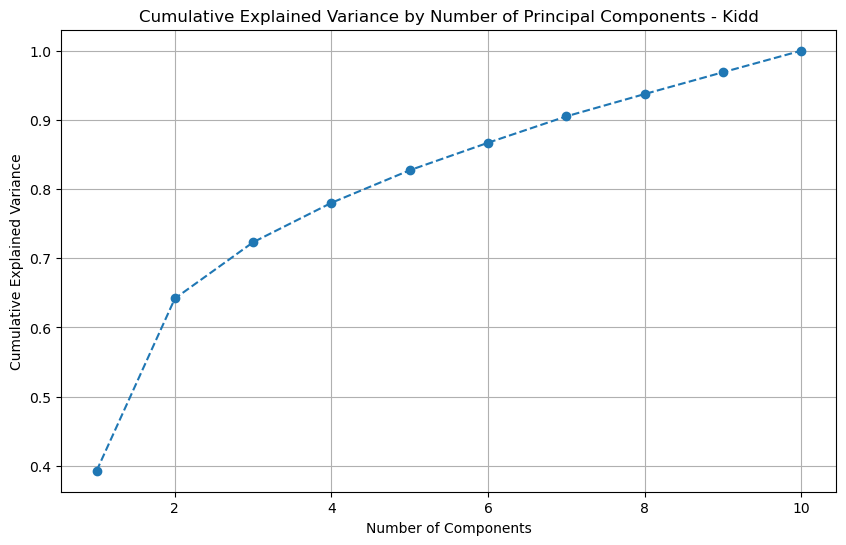

In [11]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia_kidd) + 1), cumulative_explained_inertia_kidd, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components - Kidd')
plt.grid(True)
plt.show()

In [12]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia_kidd):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.39
Components 2: Cumulative Explained Variance = 0.64
Components 3: Cumulative Explained Variance = 0.72
Components 4: Cumulative Explained Variance = 0.78
Components 5: Cumulative Explained Variance = 0.83
Components 6: Cumulative Explained Variance = 0.87
Components 7: Cumulative Explained Variance = 0.91
Components 8: Cumulative Explained Variance = 0.94
Components 9: Cumulative Explained Variance = 0.97
Components 10: Cumulative Explained Variance = 1.00


In [13]:
# Re-run MCA with the optimal number of components (i.e., 2)
mca_optimal_kidd = prince.MCA(n_components=2, 
                         n_iter=3, 
                         copy=True, 
                         check_input=True, 
                         engine='sklearn', 
                         random_state=42)

mca_optimal_kidd = mca_optimal_kidd.fit(X_encoded)

In [14]:
# Get the principal components
principal_components_kidd = mca_optimal_kidd.column_coordinates(X_encoded)

In [16]:
# Get the eigenvalues
eigenvalues_kidd = mca_optimal_kidd.eigenvalues_

In [17]:
# Calculate explained inertia (variance)
explained_inertia_kidd = eigenvalues_kidd / eigenvalues_kidd.sum()

# Cumulative explained inertia
cumulative_explained_inertia_kidd = np.cumsum(explained_inertia_kidd)

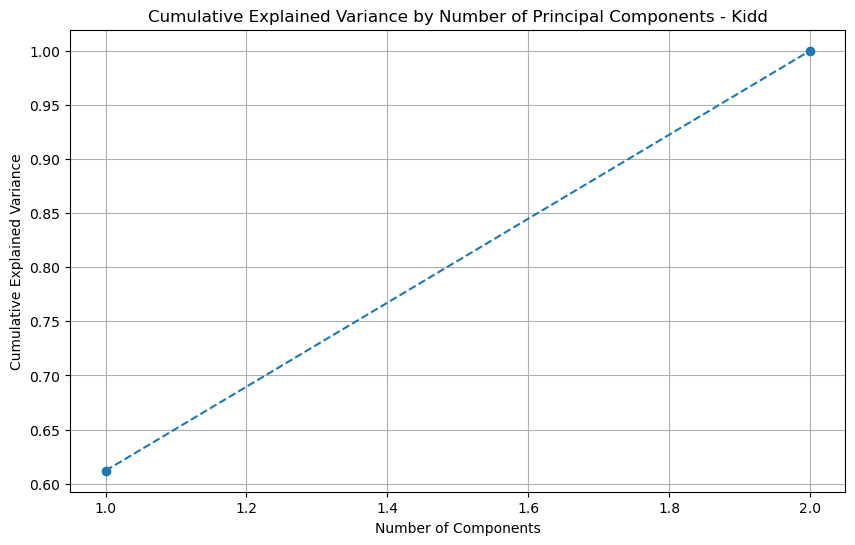

In [19]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia_kidd) + 1), cumulative_explained_inertia_kidd, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components - Kidd')
plt.grid(True)
plt.show()


In [21]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia_kidd):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.61
Components 2: Cumulative Explained Variance = 1.00


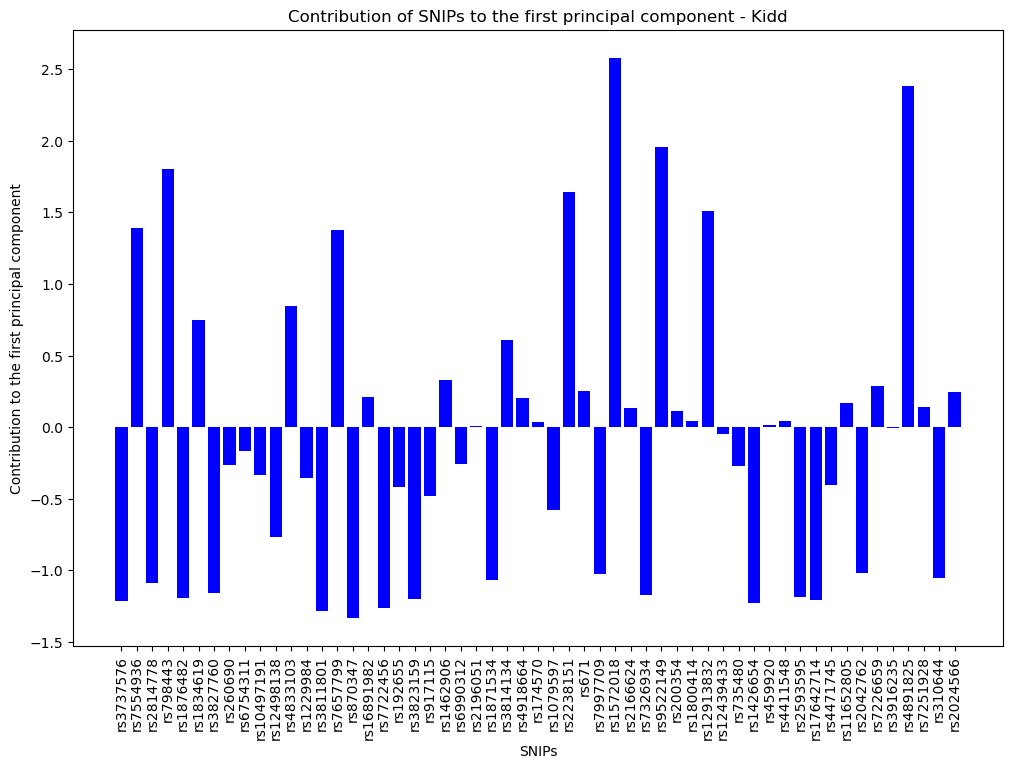

In [23]:
## FIRST PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the first principal component
num_snips = len(X.columns)
contributions_first_pc = np.zeros(num_snips)

for i in range(num_snips):
    contributions_first_pc[i] = principal_components_kidd.iloc[2*i, 0] + principal_components_kidd.iloc[2*i+1, 0]

# Plot the SNIP contributions to the first principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), contributions_first_pc, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the first principal component')
plt.title('Contribution of SNIPs to the first principal component - Kidd')
plt.show()

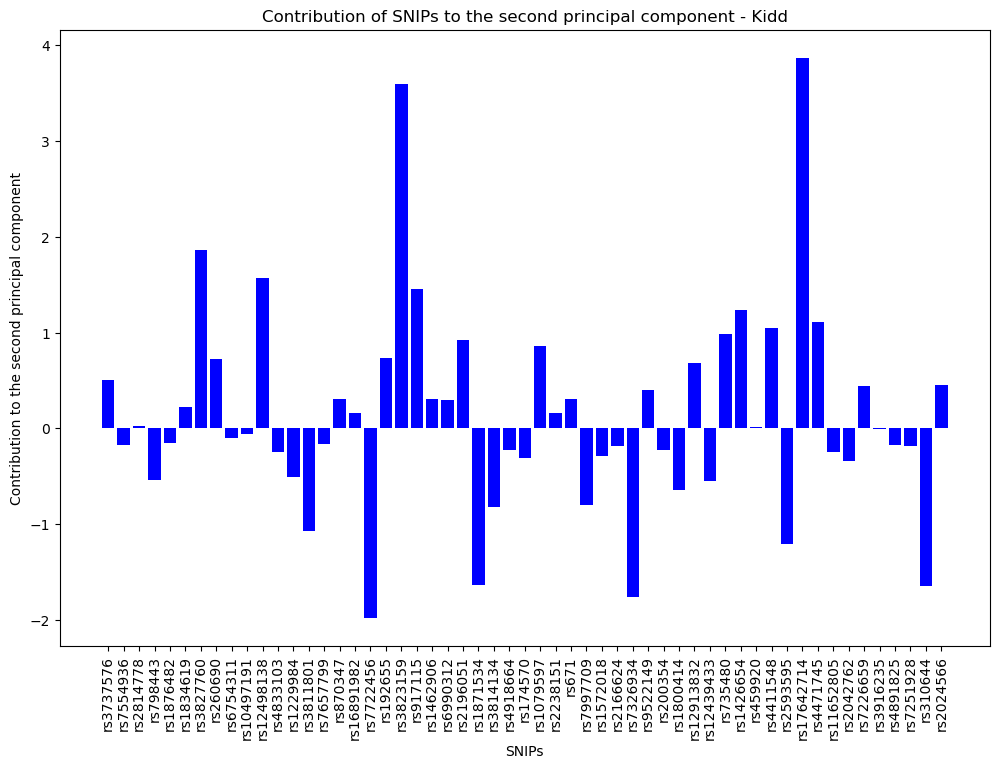

In [24]:
## SECOND PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the second principal component
contributions_second_pc = np.zeros(num_snips)

for i in range(num_snips):
    contributions_second_pc[i] = principal_components_kidd.iloc[2*i, 1] + principal_components_kidd.iloc[2*i+1, 1]

# Plot the SNIP contributions to the second principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), contributions_second_pc, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the second principal component')
plt.title('Contribution of SNIPs to the second principal component - Kidd')
plt.show()

In [25]:
# Create a DataFrame of the contributions of each SNIP to the each principal component
kidd_contributions_df = pd.DataFrame({
    'SNIP': X.columns,
    'First PCA': contributions_first_pc,
    'Second PCA': contributions_second_pc
})

# Display the DataFrame
print(kidd_contributions_df)

          SNIP  First PCA  Second PCA
0    rs3737576  -1.210769    0.500767
1    rs7554936   1.389991   -0.176135
2    rs2814778  -1.085620    0.024948
3     rs798443   1.805309   -0.540341
4    rs1876482  -1.195308   -0.151051
5    rs1834619   0.749070    0.221903
6    rs3827760  -1.157900    1.865382
7     rs260690  -0.265085    0.725960
8    rs6754311  -0.165655   -0.106210
9   rs10497191  -0.332284   -0.061206
10  rs12498138  -0.770077    1.568675
11   rs4833103   0.846169   -0.252495
12   rs1229984  -0.353799   -0.505952
13   rs3811801  -1.284635   -1.073476
14   rs7657799   1.377963   -0.168962
15    rs870347  -1.331498    0.306516
16  rs16891982   0.213203    0.164046
17   rs7722456  -1.261569   -1.981051
18    rs192655  -0.417708    0.730595
19   rs3823159  -1.201941    3.593535
20    rs917115  -0.482537    1.458327
21   rs1462906   0.332422    0.300433
22   rs6990312  -0.255211    0.290420
23   rs2196051   0.007110    0.919410
24   rs1871534  -1.064569   -1.634201
25   rs38141

In [26]:
# Export the DataFrame to a CSV file
output_file_path = 'Exhibits/kidd_snip_contributions.csv'
kidd_contributions_df.to_csv(output_file_path, index=False)

Seldin et al (2011)

In [27]:
# Load the dataset
file_path = './Resources/seldin_train.csv'
df = pd.read_csv(file_path, delimiter=',')
df.head()

,id,rs2986742,rs6541030,rs647325,rs4908343,rs1325502,rs12130799,rs3118378,rs3737576,rs7554936,...,rs3745099,rs2532060,rs6104567,rs3907047,rs2835370,rs1296819,rs4821004,rs5768007,superpopulation,gender
0,1762,TC,AA,GG,GG,AA,AA,AA,TT,CC,...,GA,CC,GT,TT,TC,AA,TT,CC,AFR,male
1,2503,TT,GG,AG,AG,GG,AA,AA,TT,CT,...,AA,CT,GG,TT,TC,CC,TC,CT,SAS,female
2,1525,CC,GG,AA,AG,GA,AA,AA,TT,CC,...,AA,CC,GT,TT,TC,CC,TC,CC,SAS,male
3,1624,CT,GG,GG,GA,GG,AA,AA,TT,TT,...,GA,TT,GT,TT,CT,CC,CC,CC,SAS,male
4,1684,TT,GG,AA,AA,GG,AA,AG,TT,TT,...,AA,CT,TT,CT,TT,AA,TT,CT,EUR,female


In [28]:
# Replace missing values with 'NN'
df_filled = df.fillna('NN')
df_filled.head()

,id,rs2986742,rs6541030,rs647325,rs4908343,rs1325502,rs12130799,rs3118378,rs3737576,rs7554936,...,rs3745099,rs2532060,rs6104567,rs3907047,rs2835370,rs1296819,rs4821004,rs5768007,superpopulation,gender
0,1762,TC,AA,GG,GG,AA,AA,AA,TT,CC,...,GA,CC,GT,TT,TC,AA,TT,CC,AFR,male
1,2503,TT,GG,AG,AG,GG,AA,AA,TT,CT,...,AA,CT,GG,TT,TC,CC,TC,CT,SAS,female
2,1525,CC,GG,AA,AG,GA,AA,AA,TT,CC,...,AA,CC,GT,TT,TC,CC,TC,CC,SAS,male
3,1624,CT,GG,GG,GA,GG,AA,AA,TT,TT,...,GA,TT,GT,TT,CT,CC,CC,CC,SAS,male
4,1684,TT,GG,AA,AA,GG,AA,AG,TT,TT,...,AA,CT,TT,CT,TT,AA,TT,CT,EUR,female


In [29]:
# Separate features and labels
X = df.iloc[:, 1:128]  # SNIPs
y_ethnic = df.iloc[:, 129]  # Superpopulation

In [30]:
# Define genotype encoding mapping
genotype_mapping = {
    'AA': 0, # reference/reference
    'CC': 0, # reference/reference
    'AT': 1, # reference/alternate
    'AG': 1, # reference/alternate
    'GA': 1, # reference/alternate
    'AC': 1, # Reference/alternate
    'CG': 1, # reference/alternate
    'CT': 1, # reference/alternate
    'TC': 1, # reference/alternate
    'TT': 2, # alternate/alternate
    'GG': 2, # alternate/alternate   
    'Unknown': 3
}

In [31]:
# Apply genotype encoding
X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))
print(X_encoded.head())

   rs2986742  rs6541030  rs647325  rs4908343  rs1325502  rs12130799  \
0          1          0         2          2          0           0   
1          2          2         1          1          2           0   
2          0          2         0          1          1           0   
3          1          2         2          1          2           0   
4          2          2         0          0          2           0   

   rs3118378  rs3737576  rs7554936  rs1040404  ...  rs874299  rs8113143  \
0          0          2          0          0  ...         2          0   
1          0          2          1          1  ...         2          1   
2          0          2          0          1  ...         2          1   
3          0          2          2          2  ...         1          0   
4          1          2          2          1  ...         0          1   

   rs3745099  rs2532060  rs6104567  rs3907047  rs2835370  rs1296819  \
0          1          0          3          2      

C:\Users\Katrina\AppData\Local\Temp\ipykernel_7560\3248816816.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))


In [32]:
# Perform MCA
mca = prince.MCA(n_components=10, 
                 n_iter=3, 
                 copy=True, 
                 check_input=True, 
                 engine='sklearn', 
                 random_state=42)

mca = mca.fit(X_encoded)

# Transform the data
X_mca = mca.transform(X_encoded)

In [34]:
# Get the eigenvalues
eigenvalues_seldin = mca.eigenvalues_

In [35]:
# Calculate explained inertia (variance)
explained_inertia_seldin = eigenvalues_seldin / eigenvalues_seldin.sum()

# Cumulative explained inertia
cumulative_explained_inertia_seldin = np.cumsum(explained_inertia_seldin)

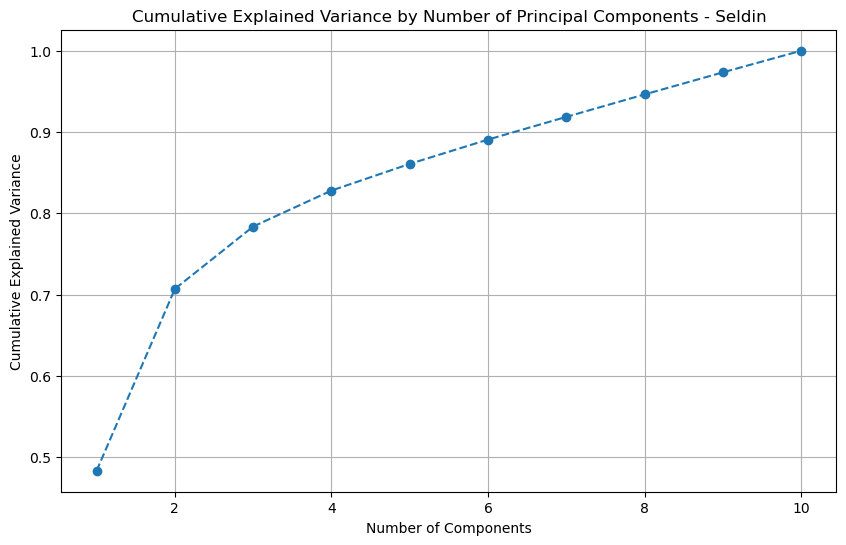

In [36]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia_seldin) + 1), cumulative_explained_inertia_seldin, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components - Seldin')
plt.grid(True)
plt.show()


In [37]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia_seldin):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.48
Components 2: Cumulative Explained Variance = 0.71
Components 3: Cumulative Explained Variance = 0.78
Components 4: Cumulative Explained Variance = 0.83
Components 5: Cumulative Explained Variance = 0.86
Components 6: Cumulative Explained Variance = 0.89
Components 7: Cumulative Explained Variance = 0.92
Components 8: Cumulative Explained Variance = 0.95
Components 9: Cumulative Explained Variance = 0.97
Components 10: Cumulative Explained Variance = 1.00


In [38]:
# Re-run MCA with the optimal number of components (i.e., 2)
mca_optimal_seldin = prince.MCA(n_components=2, 
                         n_iter=3, 
                         copy=True, 
                         check_input=True, 
                         engine='sklearn', 
                         random_state=42)

mca_optimal_seldin = mca_optimal_seldin.fit(X_encoded)

In [39]:
# Get the principal components
principal_components_seldin = mca_optimal_seldin.column_coordinates(X_encoded)

In [40]:
# Get the eigenvalues
eigenvalues_seldin = mca_optimal_seldin.eigenvalues_

In [41]:
# Calculate explained inertia (variance)
explained_inertia_seldin = eigenvalues_seldin / eigenvalues_seldin.sum()

# Cumulative explained inertia
cumulative_explained_inertia_seldin = np.cumsum(explained_inertia_seldin)

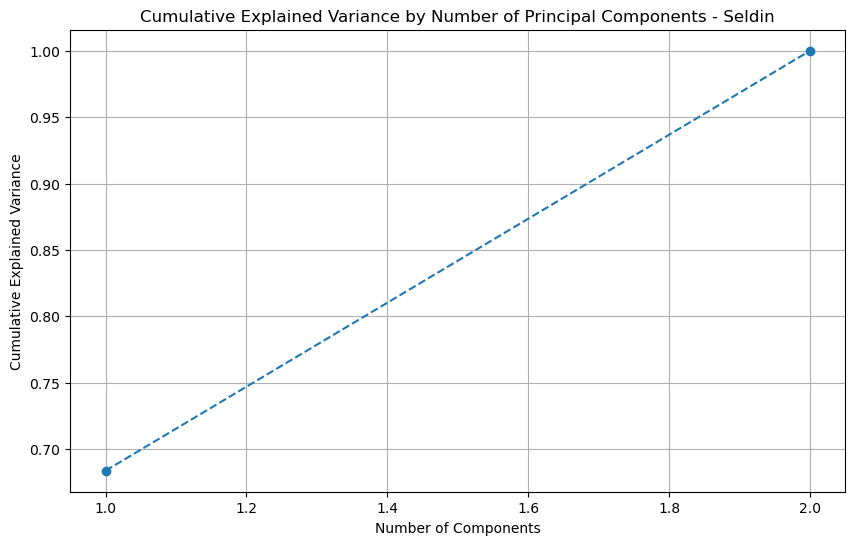

In [42]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia_seldin) + 1), cumulative_explained_inertia_seldin, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components - Seldin')
plt.grid(True)
plt.show()

In [43]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia_seldin):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.68
Components 2: Cumulative Explained Variance = 1.00


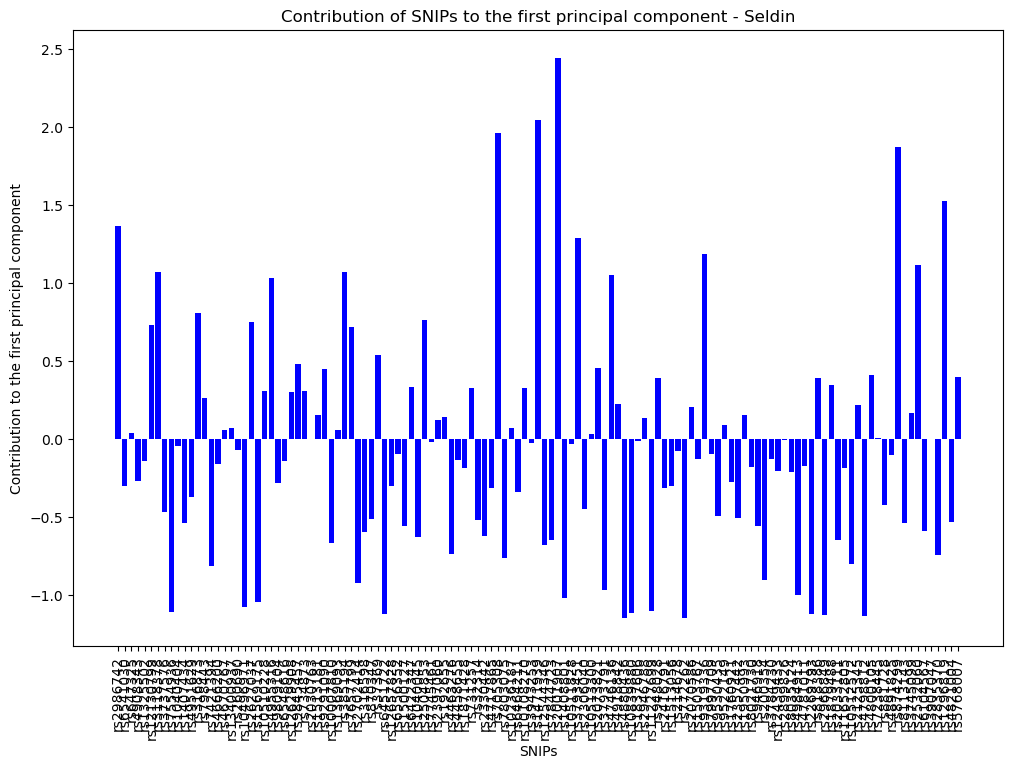

In [44]:
## FIRST PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the first principal component
num_snips = len(X.columns)
contributions_first_pc = np.zeros(num_snips)

for i in range(num_snips):
    contributions_first_pc[i] = principal_components_seldin.iloc[2*i, 0] + principal_components_seldin.iloc[2*i+1, 0]

# Plot the SNIP contributions to the first principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), contributions_first_pc, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the first principal component')
plt.title('Contribution of SNIPs to the first principal component - Seldin')
plt.show()

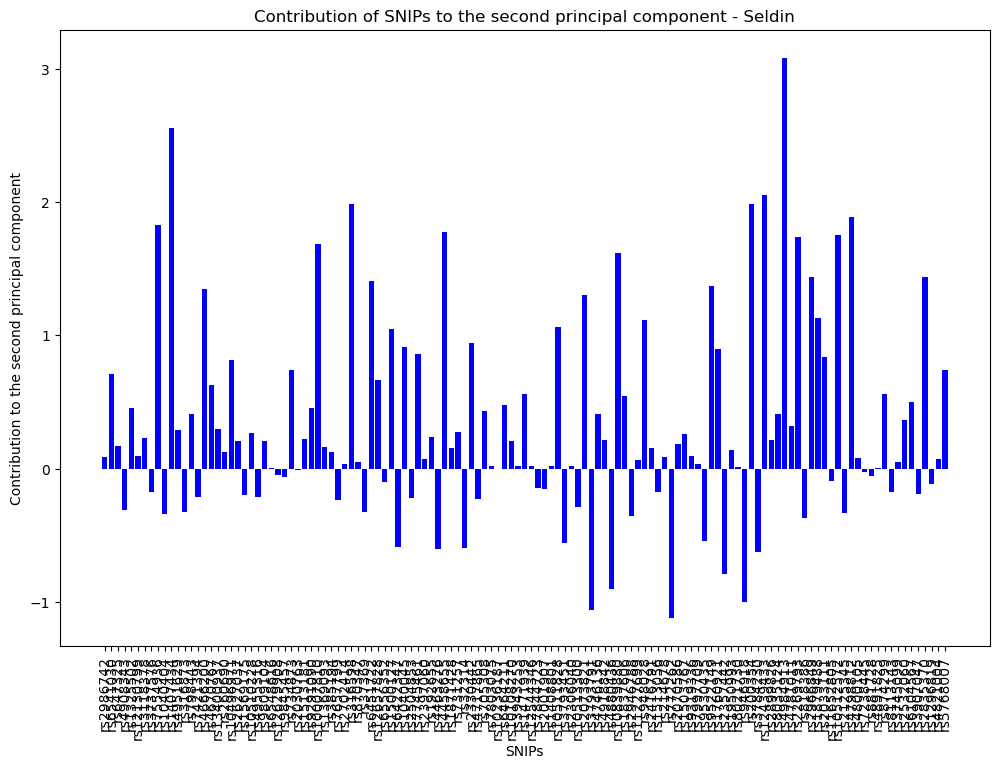

In [45]:
## SECOND PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the second principal component
contributions_second_pc = np.zeros(num_snips)

for i in range(num_snips):
    contributions_second_pc[i] = principal_components_seldin.iloc[2*i, 1] + principal_components_seldin.iloc[2*i+1, 1]

# Plot the SNIP contributions to the second principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), contributions_second_pc, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the second principal component')
plt.title('Contribution of SNIPs to the second principal component - Seldin')
plt.show()

In [46]:
# Create a DataFrame of the contributions of each SNIP to the each principal component
seldin_contributions_df = pd.DataFrame({
    'SNIP': X.columns,
    'First PCA': contributions_first_pc,
    'Second PCA': contributions_second_pc
})

# Display the DataFrame
print(seldin_contributions_df)

          SNIP  First PCA  Second PCA
0    rs2986742   1.365156    0.088958
1    rs6541030  -0.297285    0.712499
2     rs647325   0.038430    0.168898
3    rs4908343  -0.268085   -0.308888
4    rs1325502  -0.140240    0.456714
..         ...        ...         ...
122  rs3907047  -0.002219   -0.191263
123  rs2835370  -0.744454    1.439851
124  rs1296819   1.522778   -0.111841
125  rs4821004  -0.529273    0.069329
126  rs5768007   0.399715    0.744265

[127 rows x 3 columns]


In [47]:
# Export the DataFrame to a CSV file
output_file_path = 'Exhibits/seldin_snip_contributions.csv'
seldin_contributions_df.to_csv(output_file_path, index=False)